In [381]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from mono_functions import create_mono_df,locate_max
from statistics import mean
from scipy.optimize import curve_fit

In [524]:
#choose filepath to desired data
path =  "C://Users//khart//Documents//IRCSP2_data//mono_data//"
name =  "cam1_test.h5" 

In [525]:
#will create a df and print the names of the keys in the original hdf5 file
df = create_mono_df(path,name)

Keys: <KeysViewHDF5 ['images', 'response', 'std', 'wavelengths']>


In [499]:
df

,images,response,std,wavelengths
0,"[[22303, 22313, 22339, 22326, 22351, 22339, 22...",22391.573050,51.832134,6.000000
1,"[[22303, 22313, 22350, 22329, 22347, 22348, 22...",22391.499462,51.812621,6.101266
2,"[[22311, 22334, 22350, 22338, 22358, 22352, 22...",22396.689275,51.880955,6.202532
3,"[[22327, 22331, 22355, 22339, 22366, 22355, 22...",22398.169187,51.829236,6.303797
4,"[[22327, 22341, 22357, 22344, 22363, 22335, 22...",22399.440413,51.923499,6.405063
...,...,...,...,...
75,"[[22346, 22367, 22388, 22365, 22377, 22380, 22...",22416.026963,52.421999,13.594937
76,"[[22350, 22364, 22374, 22372, 22373, 22378, 22...",22417.478375,52.620502,13.696203
77,"[[22347, 22353, 22367, 22368, 22380, 22373, 22...",22417.605050,52.972239,13.797468
78,"[[22327, 22361, 22357, 22370, 22386, 22375, 22...",22420.065213,53.316597,13.898734


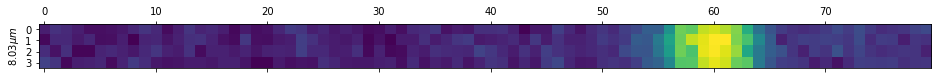

In [530]:

xmin= 90; xmax=170; ymin=114; ymax=118;
ROI= [xmin,xmax,ymin,ymax]

for i in [20]:
    plt.matshow(df["images"][i][ymin:ymax,xmin:xmax])
    #plt.colorbar()
    plt.ylabel(str(round(df["wavelengths"][i],2))+ '$\mu m$')
    plt.ax = plt.gca()
    #plt.ax.axes.xaxis.set_ticks([])
    #plt.ax.axes.yaxis.set_ticks([])

plt.show()


In [531]:
[value,loc] = locate_max(df,'images',30,ymin,ymax,xmin,xmax,-1)
loc


array([48, 49, 49, 48], dtype=int64)

In [532]:
#calculate location of maxvalues, add to database
maxlocs = []
maxvals = []

for i in range(0,len(df["wavelengths"])):
    [loc,value] = locate_max(df,'images',i,ymin,ymax,xmin,xmax,-1)
    maxlocs.append(value)
    maxvals.append(loc)

df['max_vals'] = pd.Series(maxvals) 
df['max_locs'] = pd.Series(maxlocs) 
df['avg_val'] = df['max_vals'].map(mean)
df['avg_locs'] = df['max_locs'].map(mean)

In [533]:
# pixel fit 
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B


#fit over wavelengths with lowest noise
fitmin=15;
fitmax = 40;
popt, pcov = curve_fit(f, df['wavelengths'][fitmin:fitmax], df['avg_locs'][fitmin:fitmax]) # your data x, y to fit

In [534]:
df['fit'] =  popt[0] *  df['wavelengths'] + popt[1]

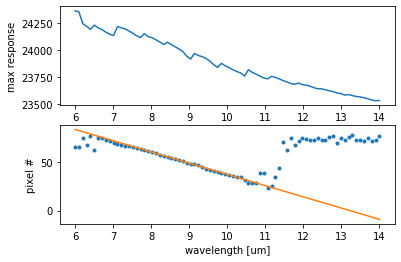

In [535]:
#plot and check fit 

plt.subplot(211)
plt.plot(df['wavelengths'],df['avg_val'])
plt.ylabel('max response')
plt.subplot(212)
plt.plot(df['wavelengths'],df['avg_locs'],'.')
plt.plot(df['wavelengths'],df['fit'],'-')
plt.xlabel('wavelength [um]')
plt.ylabel('pixel #')
plt.show()


In [536]:
#writetohdf5

#choose filepath to desired data
save_path =  "C://Users//khart//Documents//IRCSP2_data//calibration_files//"
name =  "cam1pixel" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/fitparams',  data=popt)
hf.create_dataset('/ROI',        data= ROI)
hf.close()


In [323]:
rount(df['fit'][1]

71.62000002554097

In [478]:
np.mean(df["images"][10][ymin:ymax,xmin:xmax])

24085.74